In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Randomly Generated Value with Numpy
y = np.array([5, 8, 6])

x = np.array([[2, 3], 
     [1, 4],
     [3, 2]])

In [4]:
# Taking an Random Regularization Value  = 2
random_lambda = 2

In [5]:
# Calculating the mean value
y_mean = np.mean(y)
xi1_mean = np.mean(x[:, 0])
xi2_mean = np.mean(x[:, 1])

In [6]:
print("Mean value of y", y_mean)
print("Mean value of xi1", xi1_mean)
print("Mean value of xi2", xi2_mean)

Mean value of y 6.333333333333333
Mean value of xi1 2.0
Mean value of xi2 3.0


In [7]:
y_centeredValue = y - y_mean
xi1_centeredValue = x[:, 0] - xi1_mean
xi2_centeredValue = x[:, 1] - xi2_mean

In [8]:
print("centered value of y", y_centeredValue)
print("centered value of xi1", xi1_centeredValue)
print("centered value of xi2", xi2_centeredValue)

centered value of y [-1.33333333  1.66666667 -0.33333333]
centered value of xi1 [ 0. -1.  1.]
centered value of xi2 [ 0.  1. -1.]


In [10]:
x_centered_matrix = np.column_stack((xi1_centeredValue, xi2_centeredValue))
print("X matrix: \n", x_centered_matrix)

X matrix: 
 [[ 0.  0.]
 [-1.  1.]
 [ 1. -1.]]


In [13]:
# Ridge Regression Estimation Create
xTx = np.dot(x_centered_matrix.T, x_centered_matrix)
print("X transpose and X matrix multiplication: \n", xTx)
lambdaI = random_lambda * np.eye(x_centered_matrix.shape[1])
print("\nLambda and Identical matrix multiplication: \n", lambdaI)
inverseMatirx = np.linalg.inv(xTx + lambdaI)
print("\ninverseMatirx : \n",inverseMatirx)
xTy = np.dot(x_centered_matrix.T, y_centeredValue)
print("\nX transpose and y matrix multiplication: \n", xTy)

totalMultiplication = np.dot(inverseMatirx, xTy)
print("\nTotal Multiplication Value: \n", totalMultiplication)

X transpose and X matrix multiplication: 
 [[ 2. -2.]
 [-2.  2.]]

Lambda and Identical matrix multiplication: 
 [[2. 0.]
 [0. 2.]]

inverseMatirx : 
 [[0.33333333 0.16666667]
 [0.16666667 0.33333333]]

X transpose and y matrix multiplication: 
 [-2.  2.]

Total Multiplication Value: 
 [-0.33333333  0.33333333]


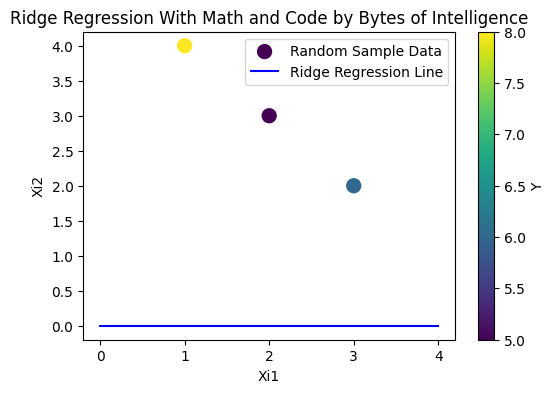

In [15]:
# Creating a Visualization
fig, ax = plt.subplots(figsize = (6, 4))
scatter = ax.scatter(x[:, 0], x[:, 1], 
                     c = y, 
                     cmap = "viridis",
                     s= 100,
                     label = "Random Sample Data")

x_values = np.linspace(0, 4, 100)
y_values = totalMultiplication[0] * x_values + totalMultiplication[1] * x_values
ax.plot(x_values, y_values, 
        color=  "blue", 
        label = "Ridge Regression Line")

ax.set_xlabel("Xi1")
ax.set_ylabel("Xi2")
ax.legend()
cbar = plt.colorbar(scatter)
cbar.set_label("Y")

plt.title("Ridge Regression With Math and Code by Bytes of Intelligence")
plt.show()

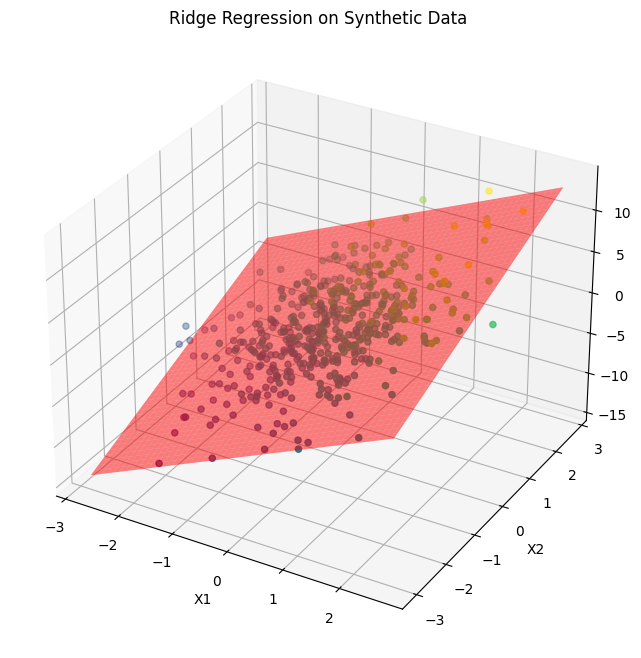

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X1 = np.random.normal(0, 1, 500)
X2 = np.random.normal(0, 1, 500)
y = 3*X1 + 2*X2 + np.random.normal(0, 2, 500)

# Regularization parameter
lambda_ = 2

# Step 1: Calculate the mean values for y, x1, and x2
y_mean = np.mean(y)
x1_mean = np.mean(X1)
x2_mean = np.mean(X2)

# Step 2: Center the response and predictor variables
y_centered = y - y_mean
x1_centered = X1 - x1_mean
x2_centered = X2 - x2_mean

# Centered X matrix
X_centered = np.column_stack((x1_centered, x2_centered))

# Step 3: Compute the ridge regression estimates
XTX = np.dot(X_centered.T, X_centered)
lambda_I = lambda_ * np.eye(X_centered.shape[1])
inverse_term = np.linalg.inv(XTX + lambda_I)
XTy = np.dot(X_centered.T, y_centered)
beta_ridge = np.dot(inverse_term, XTy)

# Visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of sample data
scatter = ax.scatter(X1, X2, y, c=y, cmap='viridis', s=20)

# Regression plane
x1_values = np.linspace(X1.min(), X1.max(), 100)
x2_values = np.linspace(X2.min(), X2.max(), 100)
X1_values, X2_values = np.meshgrid(x1_values, x2_values)
Y_values = beta_ridge[0] * X1_values + beta_ridge[1] * X2_values
ax.plot_surface(X1_values, X2_values, Y_values, color='r', alpha=0.5)

# Labels and legend
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Ridge Regression on Synthetic Data')

plt.show()
